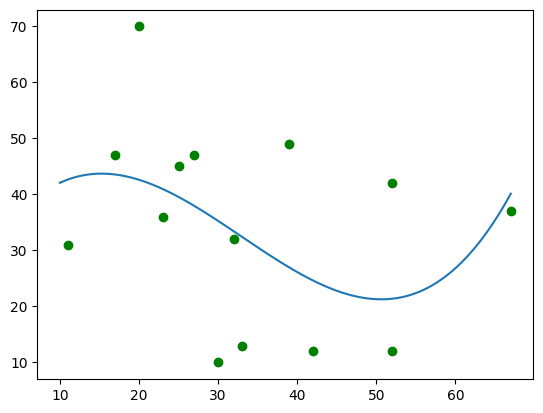

In [15]:
# Bad fit
import pandas as pd
import numpy 
import matplotlib.pyplot as plt

x = [20,30,33,42,52,67,23,11,32,52,27,39,25,17]
y = [70,10,13,12,12,37,36,31,32,42,47,49,45,47]

myModel = numpy.poly1d(numpy.polyfit(x,y,3))
myLine = numpy.linspace(10,67,100)
# 10 is ----> starting limit
# 67 is ----> ending limit
# 100 is space between those limits and it effect on line

plt.scatter(x,y,color="green")
plt.plot(myLine,myModel(myLine))
plt.show()

In [5]:
import numpy
from sklearn.metrics import r2_score

x = [20,30,33,42,52,67,23,11,32,52,27,39,25,17]
y = [70,10,13,12,12,37,36,31,32,42,47,49,45,47]

model = numpy.poly1d(numpy.polyfit(x,y,3))
print(r2_score(y,model(x)))

0.20490171039139715


The score of this model is:  0.9432150416451026


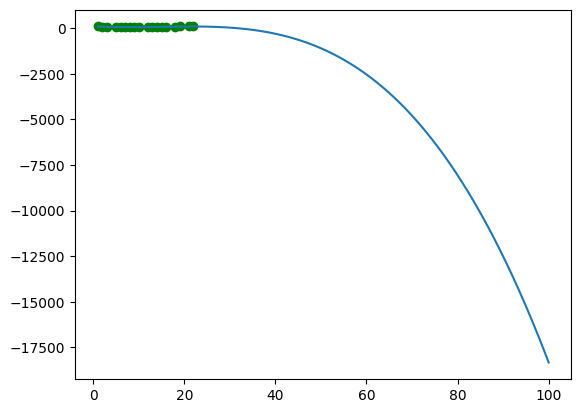

In [28]:
# best fit model
from sklearn.metrics import r2_score
x1 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y1 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
model1 = numpy.poly1d(numpy.polyfit(x1,y1,3))
print("The score of this model is: ",r2_score(y1,model1(x1)))

model1 = numpy.poly1d(numpy.polyfit(x1,y1,3))
line1 = numpy.linspace(1,100,1000)

plt.scatter(x1,y1,color="green")
plt.plot(line1,model1(line1))
plt.show()

In [29]:
# Prediction
import numpy
from sklearn.metrics import r2_score
x1 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y1 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
model1 = numpy.poly1d(numpy.polyfit(x1,y1,3))
print("The score of this model is: ",r2_score(y1,model1(x1)))

speed = model1(18)
speed

The score of this model is:  0.9432150416451026


92.48673749579989

# Hand-on Example of polynomial regression

In [30]:
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 
# importing the dataset
df = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [32]:
# Splitting
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [33]:
from sklearn.model_selection import train_test_split

# Assuming you have your features 'X' and target 'y' already defined
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



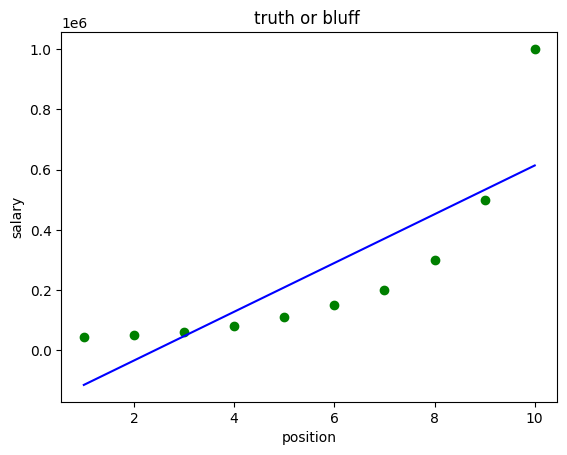

In [45]:
from sklearn.linear_model import LinearRegression   
lin_reg = LinearRegression().fit(x,y)
def viz_linear():
    plt.scatter(x,y,color="green")
    plt.plot(x,reg.predict(x),color="blue")
    plt.title("truth or bluff ")
    plt.xlabel("position")
    plt.ylabel("salary")
    plt.show()

viz_linear()

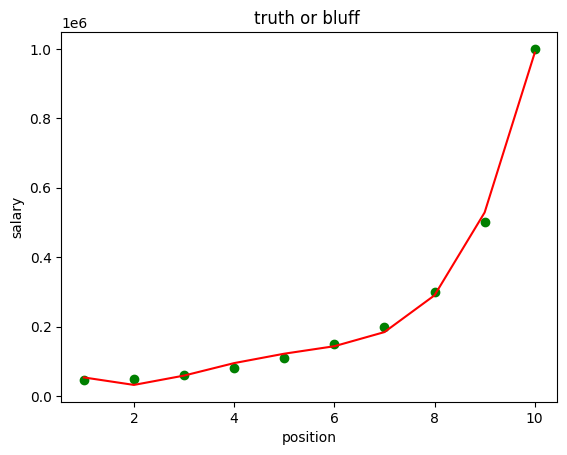

In [46]:
# fitting polynomial to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression().fit(x_poly,y)

def viz_polynomial():
    plt.scatter(x,y,color="green")
    plt.plot(x,pol_reg.predict(poly_reg.fit_transform(x)),color="red")
    plt.title("truth or bluff ")
    plt.xlabel("position")
    plt.ylabel("salary")
    plt.show()

viz_polynomial()

In [47]:
# predicting new value
pred_linear = lin_reg.predict([[11]])
pred_polynomial = pol_reg.predict(poly_reg.fit_transform([[11]]))

In [48]:
print("Linear regression result       =",pred_linear)
print("Polynomial regression result   =",pred_polynomial)

print("the difference is: ",pred_linear - pred_polynomial)

Linear regression result       = [694333.33333333]
Polynomial regression result   = [1780833.33333358]
the difference is:  [-1086500.00000025]
